In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
data=pd.read_csv(r"C:\Users\Sanjay Mali\OneDrive\Documents\nexus\infolimpioavanzadoTarget.csv")


C:\Users\Sanjay Mali\AppData\Local\Temp\ipykernel_24924\2298372368.py:1: DtypeWarning: Columns (21,22,30,31,48,49,57,58,75,76,84,85,102,103,111,112,129,130,138,139,156,157,162,163) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"C:\Users\Sanjay Mali\OneDrive\Documents\nexus\infolimpioavanzadoTarget.csv")


In [4]:
data.head(7)

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,03-01-2022,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,04-01-2022,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,05-01-2022,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,06-01-2022,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,07-01-2022,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0
5,10-01-2022,15.680000,16.010000,15.170000,15.860000,15.860000,116700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.006903,-0.460000,-2.818628,0
6,11-01-2022,15.750000,16.500000,15.690000,16.280001,16.280001,85800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.740293,-1.300001,-7.394773,0


In [6]:
data.tail()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
7776,23-12-2022,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,...,23.600000,26.223672,27.022465,26.223672,27.022465,-0.798793,0.333333,NaN,NaN,0
7777,27-12-2022,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,...,23.610001,30.764722,28.003602,30.764722,28.003602,2.761119,0.625850,NaN,NaN,0
7778,28-12-2022,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,...,23.610001,30.764722,29.251039,30.764722,29.251039,1.513683,1.034014,NaN,NaN,0
7779,29-12-2022,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.740000,46.457382,35.995609,46.457382,35.995609,10.461773,0.482993,NaN,NaN,0
7780,30-12-2022,23.680000,23.760000,23.610001,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.760000,45.784072,41.002059,45.784072,41.002059,4.782013,0.482993,NaN,NaN,0


In [7]:
data.shape

(7781, 192)

In [8]:
required_columns = ['date', 'close', 'high','low','open','volume']

In [10]:
data1 = data[required_columns]

In [11]:
data1.head()

,date,close,high,low,open,volume
0,03-01-2022,17.760000,18.219000,17.500000,17.799999,106600
1,04-01-2022,17.660000,18.309999,17.620001,17.700001,128700
2,05-01-2022,16.950001,17.799999,16.910000,17.580000,103100
3,06-01-2022,16.170000,16.879999,16.139999,16.650000,173600
4,07-01-2022,15.710000,16.290001,15.630000,16.219999,137800


In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7781 non-null   object 
 1   close   7781 non-null   float64
 2   high    7781 non-null   float64
 3   low     7781 non-null   float64
 4   open    7781 non-null   float64
 5   volume  7781 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 364.9+ KB


In [17]:
data1.duplicated().sum().any()

False

In [18]:
data1.isnull().sum()

date      0
close     0
high      0
low       0
open      0
volume    0
dtype: int64

In [21]:
data1.describe()

,close,high,low,open,volume
count,7781.000000,7781.000000,7781.000000,7781.000000,7.781000e+03
mean,34.964414,35.655999,34.301243,34.990220,7.586022e+05
std,99.790823,101.451058,98.073945,99.841502,3.934491e+06
min,0.408000,0.435000,0.405000,0.410000,0.000000e+00
25%,4.030000,4.130000,3.980000,4.050000,1.080000e+04
50%,10.080000,10.110000,10.005000,10.080000,8.406000e+04
75%,24.250000,24.500000,24.080000,24.350000,6.724000e+05
max,797.489990,799.359985,784.960022,795.739990,1.615550e+08


In [22]:
d=data1.describe()
d.corr()

,close,high,low,open,volume
close,1.000000,1.000000,0.999999,1.000000,-0.049398
high,1.000000,1.000000,0.999998,1.000000,-0.049205
low,0.999999,0.999998,1.000000,0.999999,-0.050978
open,1.000000,1.000000,0.999999,1.000000,-0.049629
volume,-0.049398,-0.049205,-0.050978,-0.049629,1.000000


<Axes: >

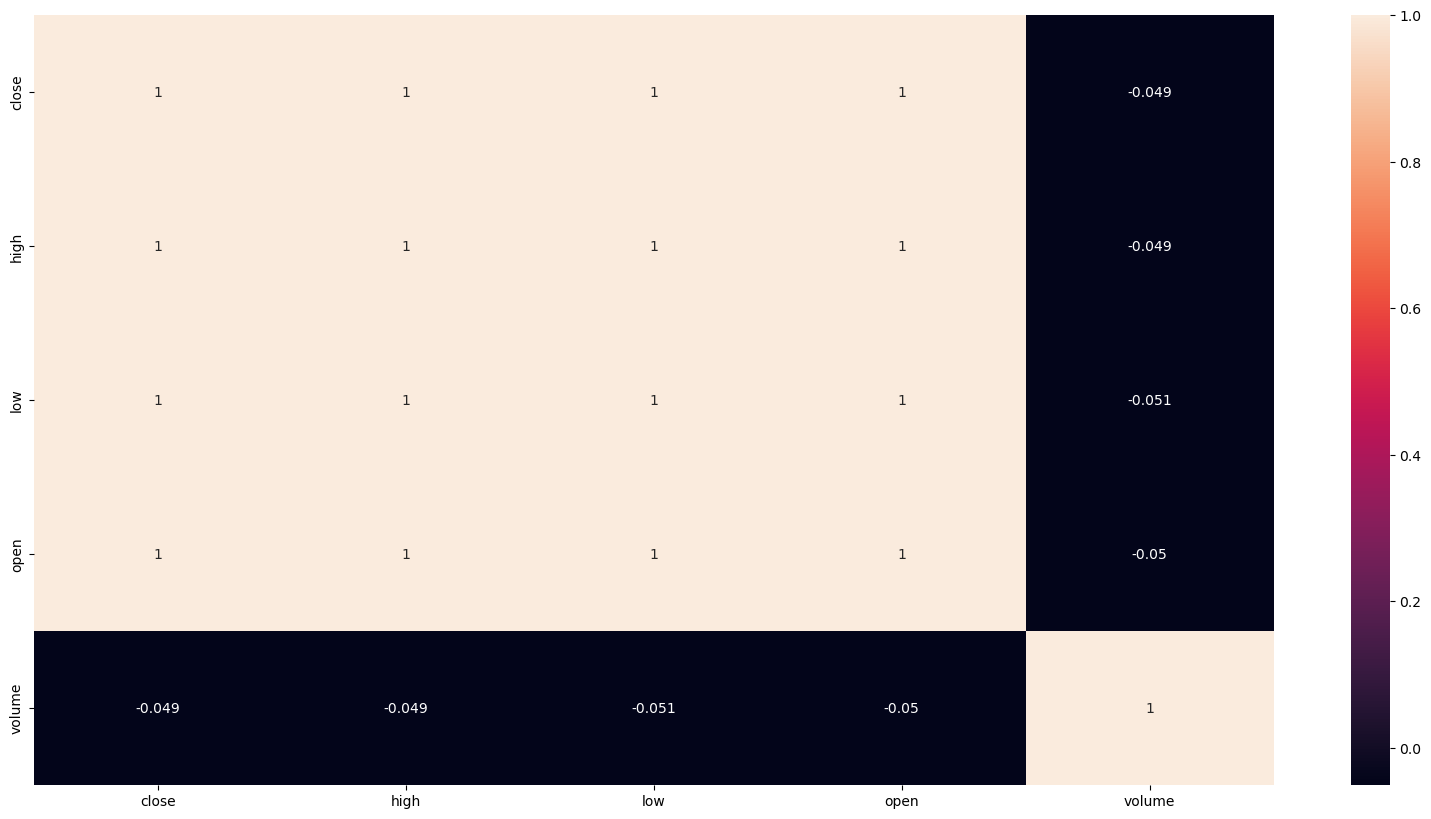

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(d.corr(), annot=True)

C:\Users\Sanjay Mali\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


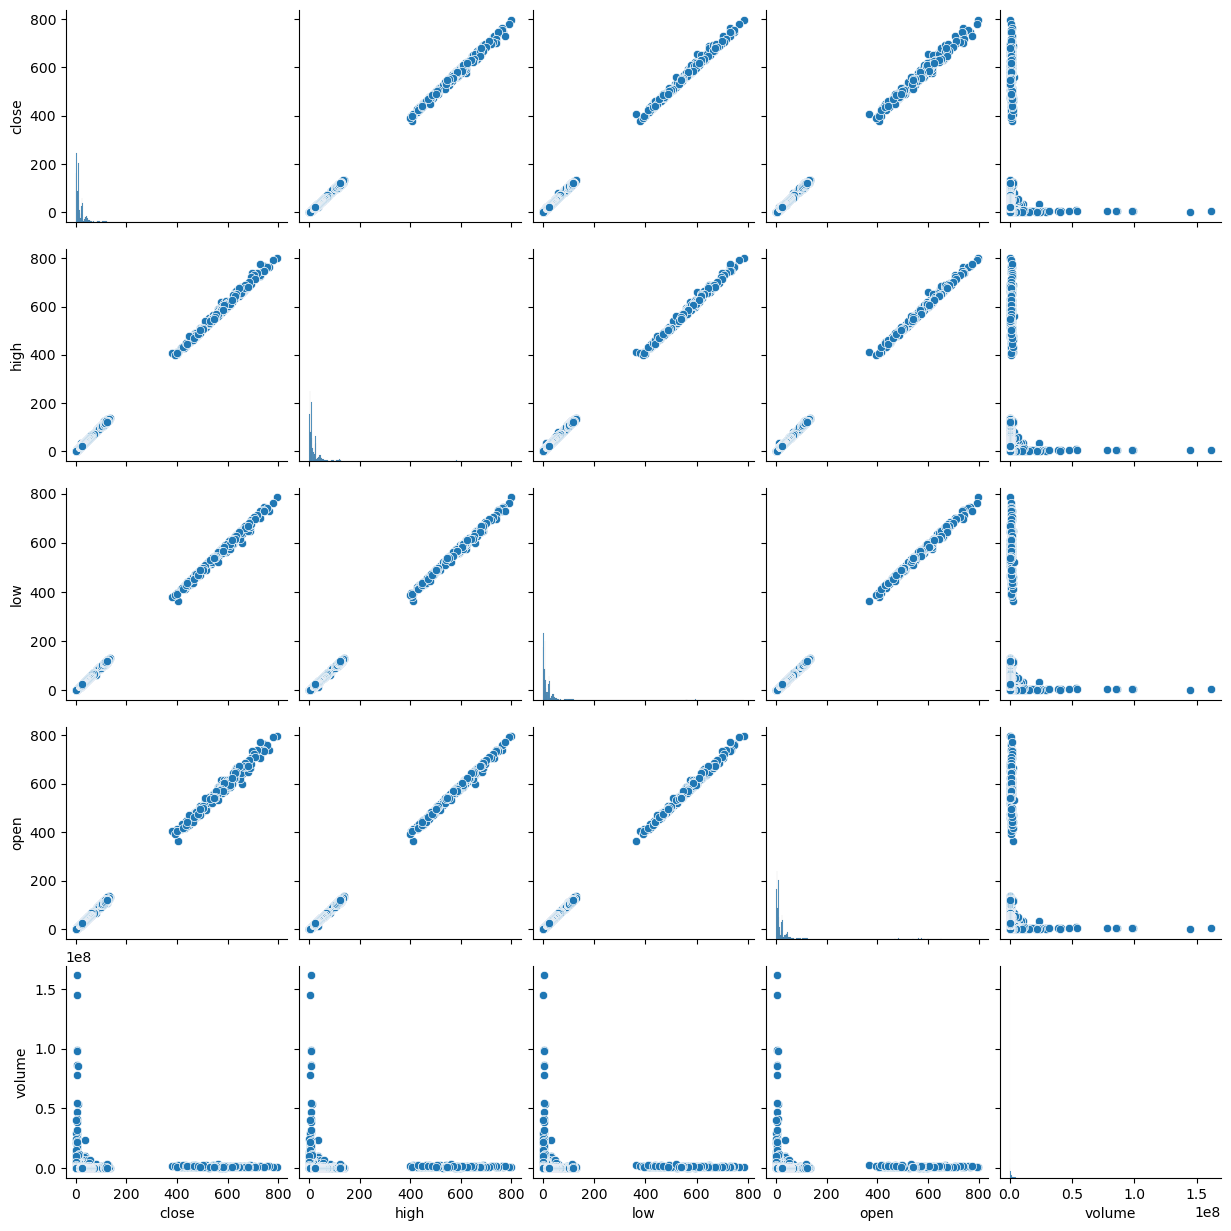

In [25]:
sns.pairplot(data1)

<Axes: >

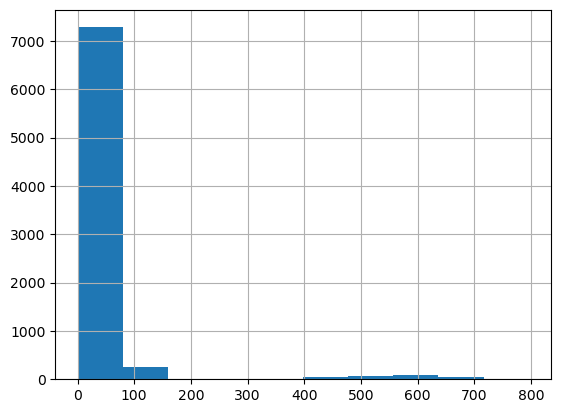

In [26]:
data1['open'].hist()

<Axes: >

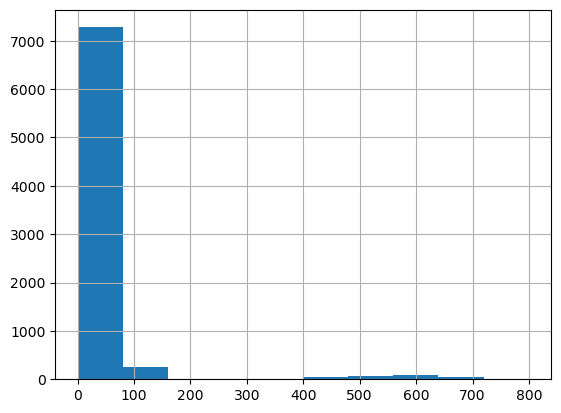

In [27]:
data1['high'].hist()

<Axes: >

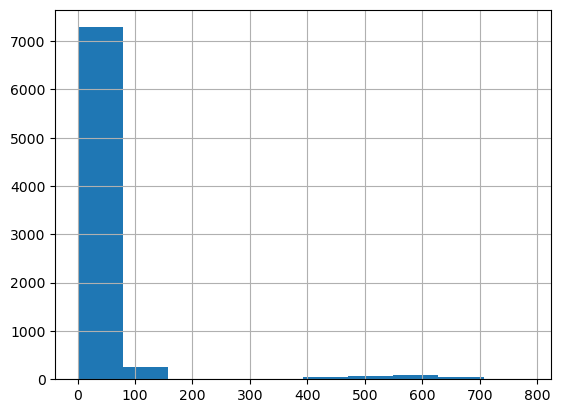

In [28]:
data1['low'].hist()

<Axes: >

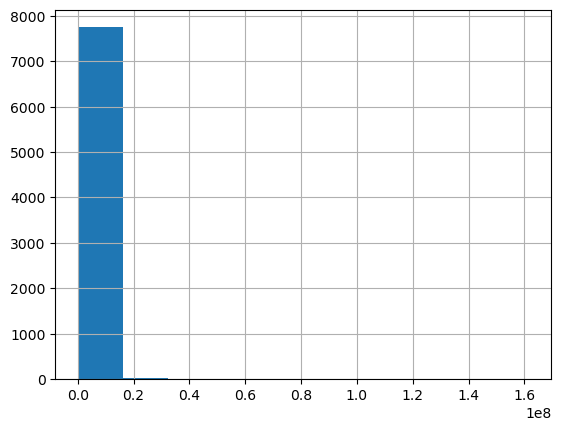

In [29]:
data1['volume'].hist()

<Axes: >

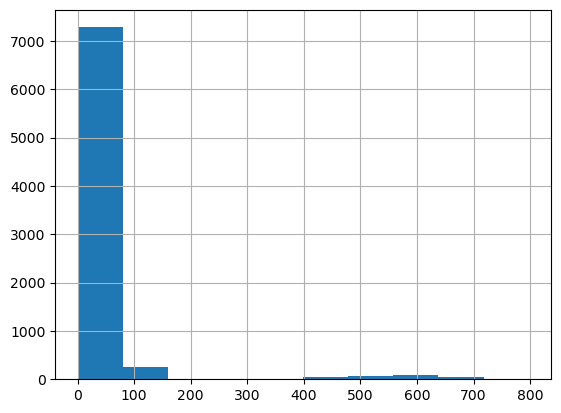

In [31]:
data1['close'].hist()

In [36]:
data1.head()

,date,close,high,low,open,volume
0,03-01-2022,17.760000,18.219000,17.500000,17.799999,106600
1,04-01-2022,17.660000,18.309999,17.620001,17.700001,128700
2,05-01-2022,16.950001,17.799999,16.910000,17.580000,103100
3,06-01-2022,16.170000,16.879999,16.139999,16.650000,173600
4,07-01-2022,15.710000,16.290001,15.630000,16.219999,137800


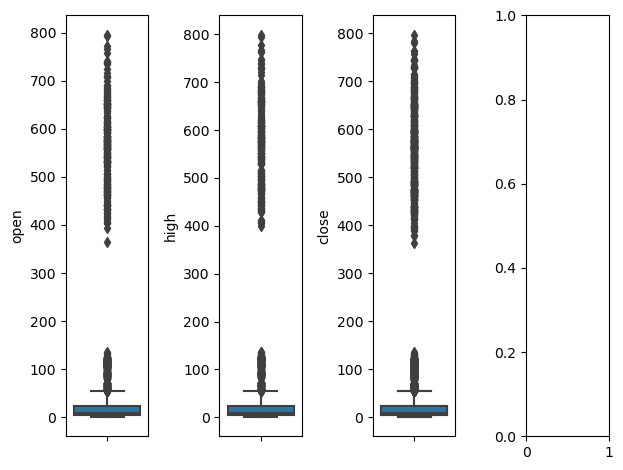

In [45]:
f,axes=plt.subplots(1,4)
sns.boxplot(y='open',data=data,ax=axes[0])
sns.boxplot(y='high',data=data,ax=axes[1])
sns.boxplot(y='low',data=data,ax=axes[2])
sns.boxplot(y='close',data=data,ax=axes[2])
plt.tight_layout()

In [50]:
import plotly.graph_objects as gp
f=go.Figure(data=[gp.Candlestick(x=data['date'],
                                 open=data['open'],high=data['high'],
                                 low=data['low'],close=data['close'])])
f.update_layout(title="Stock Price Analysis", xaxis_rangeslider_visible=False)

In [53]:
x=data[['open','high','low','volume']].values 
y=data['close'].values 

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [55]:
x_train.shape

(6224, 4)

In [56]:
y_train.shape

(6224,)

In [57]:
x_test.shape

(1557, 4)

In [58]:
y_test.shape

(1557,)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [62]:
lr=LinearRegression()

In [63]:
model=lr.fit(x_train,y_train)

In [64]:
y_pred=lr.predict(x_test)
y_pred

array([ 2.90641794,  8.91723149, 13.26071526, ...,  9.8595378 ,
        3.90289272, 25.1817159 ])

In [65]:
y_pred.shape

(1557,)

In [66]:
print("coefficient of model : ",lr.coef_)
print("Intercepts of model : ",lr.intercept_)

coefficient of model :  [-7.58404451e-01  8.86098012e-01  8.73209376e-01 -6.85527746e-10]
Intercepts of model :  -0.039516453756952785


In [67]:
df2=pd.DataFrame(y_test,y_pred)
df3=pd.DataFrame({'Actual Price ':y_test,'Predicted price':y_pred})
df3

,Actual Price,Predicted price
0,2.960000,2.906418
1,8.930000,8.917231
2,13.250000,13.260715
3,20.820000,20.960250
4,3.390000,3.306210
...,...,...
1552,14.250000,13.950791
1553,3.360000,3.291849
1554,9.880000,9.859538
1555,3.940000,3.902893


In [68]:
df3.describe()

,Actual Price,Predicted price
count,1557.000000,1557.000000
mean,33.106336,33.134760
std,95.720714,95.901952
min,0.424000,0.394004
25%,4.030000,4.006100
50%,10.010000,9.991517
75%,24.000000,23.966509
max,709.140015,703.927913


C:\Users\Sanjay Mali\AppData\Local\Temp\ipykernel_24924\2167544440.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

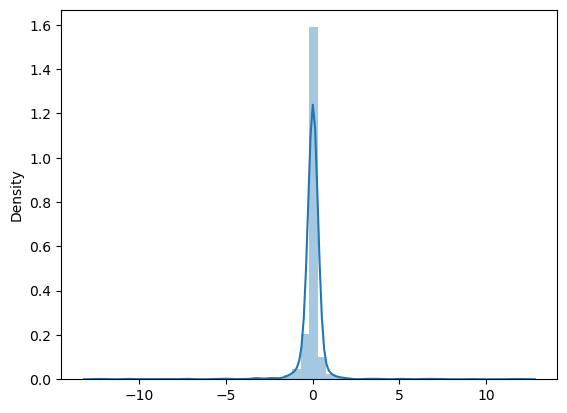

In [69]:
n=y_test - y_pred
sns.distplot(n)

In [71]:
con=lr.score(x_test,y_test)
print("Linear regression confidence score :",con)

Linear regression confidence score : 0.9998688098718687


In [72]:
import math 
print("Mean absolute error : ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error : ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean absolute error : ",math.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean absolute error :  0.3151223474738601
Mean squared error :  1.2012516551010626
Root Mean absolute error :  0.5613575932272228


In [73]:
x2=abs(y_pred-y_test)
y2=100*(x2/y_test)
accuracy=100-np.mean(y2)
print("accuracy is : ",round(accuracy,2),"%")

accuracy is :  98.51 %


<Axes: >

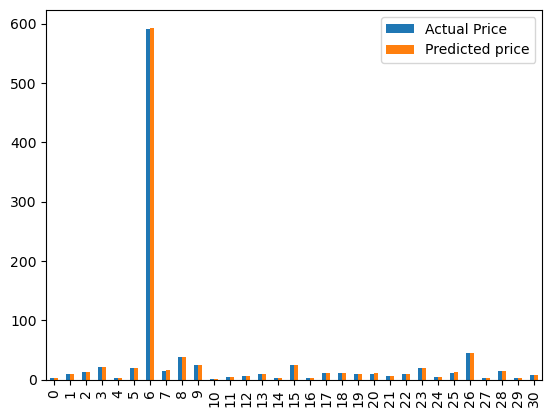

In [74]:
graph=df3.head(31)
graph.plot(kind='bar')